Load Data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualize Images

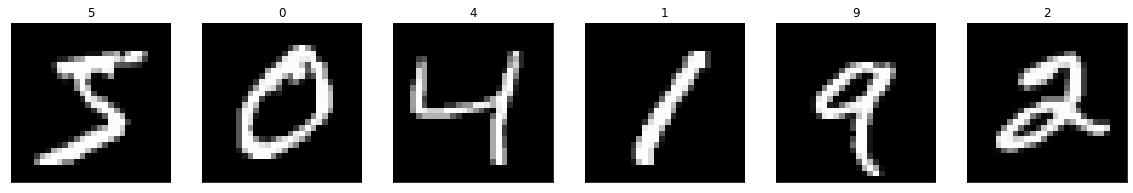

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize = (20, 20))
for i in range(6):
  ax = fig.add_subplot(1, 6, (i+1), xticks = [], yticks = [])
  ax.imshow(X_train[i], cmap = 'gray')
  ax.set_title(Y_train[i])

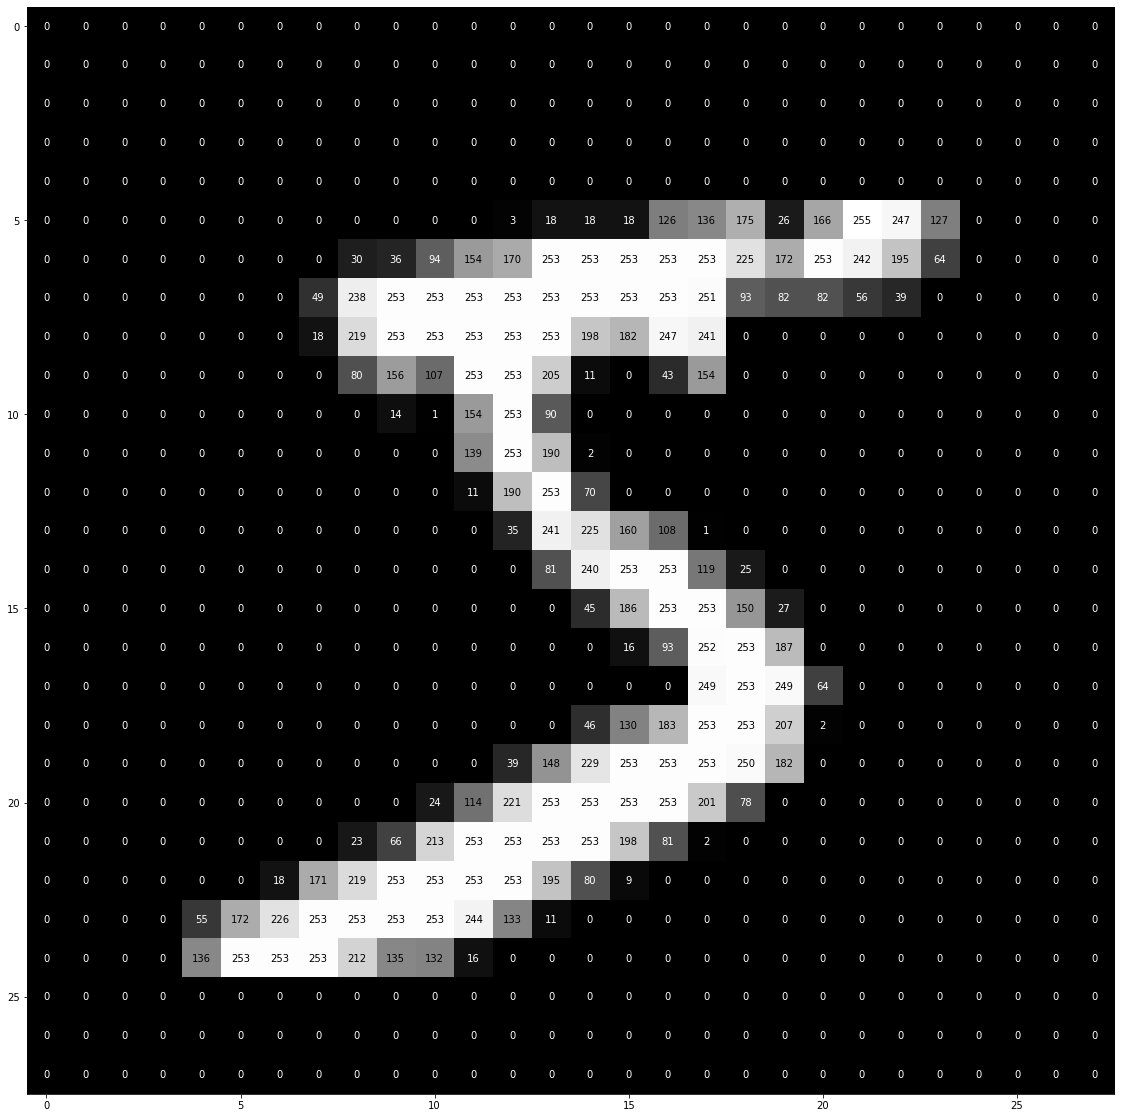

In [3]:
def visualize_one_image(img_data):
  fig = plt.figure(figsize=(20, 20))
  ax = fig.add_subplot()
  ax.imshow(img_data, cmap='gray')
  (width, height) = img_data.shape
  text_in_black = img_data.max() / 2.5
  for x in range(width):
    for y in range(height):#verticalalignment
      ax.annotate(img_data[x][y], xy = (y, x), horizontalalignment = 'center', verticalalignment = 'center',
                  color = 'white' if img_data[x][y] < text_in_black else 'black')

visualize_one_image(X_train[0])

Preprocessing

In [4]:
# Image Rescale
print(X_train[0].dtype, X_train[0][0].dtype)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(X_train[0].dtype, X_train[0][0].dtype)

uint8 uint8
float32 float32


In [5]:
# Image Reshape for Model Input
(num_rows, num_cols) = X_train[0].shape

X_train = X_train. (X_train.shape[0], num_rows, num_cols, 1)
X_test = X_test.reshape(X_test.shape[0], num_rows, num_cols, 1)

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
# One Hot Encoding
from keras.utils import np_utils

num_classes = len(np.unique(Y_test))
print(Y_train[:10])

Y_train = np_utils.to_categorical(Y_train, num_classes = num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes = num_classes)

print(Y_train[:10])


[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
# Model Necessary Imports

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

Model 1

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()
#((m * n * d)+1)* k) - Parmeters calculations conv layer
# (c * p(flatten) + 1*c)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:


best_model = ModelCheckpoint(filepath = 'model.weights.best.hdf5', verbose=1, save_best_only=True)

history = model.fit(
    X_train, 
    Y_train, 
    batch_size=16, 
    epochs = 50,
    verbose = 1,
    callbacks = [best_model],
    validation_data = (X_test, Y_test),
    shuffle=True,
)

Epoch 1/50
3740/3750 [============================>.] - ETA: 0s - loss: 0.1165 - accuracy: 0.9641
Epoch 1: val_loss improved from inf to 0.04573, saving model to model.weights.best.hdf5
3750/3750 [==============================] - 26s 4ms/step - loss: 0.1163 - accuracy: 0.9642 - val_loss: 0.0457 - val_accuracy: 0.9858
Epoch 2/50
3743/3750 [============================>.] - ETA: 0s - loss: 0.0470 - accuracy: 0.9869
Epoch 2: val_loss improved from 0.04573 to 0.03544, saving model to model.weights.best.hdf5
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0470 - accuracy: 0.9869 - val_loss: 0.0354 - val_accuracy: 0.9886
Epoch 3/50
3749/3750 [============================>.] - ETA: 0s - loss: 0.0364 - accuracy: 0.9898
Epoch 3: val_loss improved from 0.03544 to 0.03305, saving model to model.weights.best.hdf5
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0364 - accuracy: 0.9898 - val_loss: 0.0330 - val_accuracy: 0.9899
Epoch 4/50
3741/3750 [==========

KeyboardInterrupt: ignored

In [ ]:
model.load_weights('model.weights.best.hdf5')

In [ ]:
pred = model.evaluate(X_test, Y_test, verbose = 1)
accuracy = 100*pred[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0290 - accuracy: 0.9911
Test accuracy: 99.1100%


2nd model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape = (num_rows, num_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
best_fit_model2 = ModelCheckpoint(filepath = 'model2.weights.best.hdf5', verbose=1, save_best_only=True)

history = model.fit(X_train, Y_train, 
                    batch_size = 32,
                    epochs = 50, 
                    verbose = 1,
                    callbacks = [best_fit_model2],
                    validation_data = (X_test, Y_test),
)

In [ ]:
model.load_weights('model2.weights.best.hdf5')

In [ ]:
score  = model.evaluate(X_test, Y_test, verbose = 2)
print('Test Accuracy is ', score[1] * 100)

313/313 - 1s - loss: 0.0295 - accuracy: 0.9904 - 841ms/epoch - 3ms/step
Test Accuracy is  99.04000163078308


Model 3

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = X_train[0].shape))
model.add(Conv2D(64, (3, 3), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 128)        

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
best_fit_model3 = ModelCheckpoint(filepath = 'model3.weights.best.hdf5', verbose = 1, save_best_only =True)

histor = model.fit(X_train, Y_train,
                   batch_size = 32,
                   epochs = 50,
                   verbose = 1,
                   callbacks = [best_fit_model3],
                   validation_data = (X_test, Y_test)
)

In [ ]:
model.load_weights('model3.weights.best.hdf5')

In [ ]:
score  = model.evaluate(X_test, Y_test, verbose = 1)
print('Model 3 Accuracy', score[1]*100)

313/313 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9898
Model 3 Accuracy 98.9799976348877


Model 4

In [ ]:
from tensorflow.keras.layers import Activation

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation= 'relu', input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation  = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(10, (3, 3)))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 10)          1

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from matplotlib.rcsetup import validate_axisbelow
best_fit_model4 = ModelCheckpoint(filepath = 'model4.weights.best.hdf5', verbose=1, save_best_only=True)

history = model.fit(X_train, Y_train,
                    batch_size = 16,
                    epochs = 30,
                    verbose = 2,
                    callbacks = [best_fit_model4],
                    validation_data = (X_test, Y_test))

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.04284, saving model to model4.weights.best.hdf5
3750/3750 - 22s - loss: 0.1124 - accuracy: 0.9650 - val_loss: 0.0428 - val_accuracy: 0.9869 - 22s/epoch - 6ms/step
Epoch 2/30

Epoch 2: val_loss improved from 0.04284 to 0.03463, saving model to model4.weights.best.hdf5
3750/3750 - 11s - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0346 - val_accuracy: 0.9882 - 11s/epoch - 3ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 0.03463
3750/3750 - 11s - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0391 - val_accuracy: 0.9884 - 11s/epoch - 3ms/step
Epoch 4/30

Epoch 4: val_loss improved from 0.03463 to 0.03010, saving model to model4.weights.best.hdf5
3750/3750 - 11s - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0301 - val_accuracy: 0.9905 - 11s/epoch - 3ms/step
Epoch 5/30

Epoch 5: val_loss improved from 0.03010 to 0.02398, saving model to model4.weights.best.hdf5
3750/3750 - 11s - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Accuracy Score- ', score[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.1351 - accuracy: 0.9887
Accuracy Score-  98.86999726295471


Model 5- Within 10000 params

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = X_train[0].shape))
model.add(Conv2D(32, (5, 1), activation = 'relu'))
model.add(Conv2D(32, (1, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 1), activation = 'relu'))
model.add(Conv2D(64, (1, 5), activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, (7, 1), activation = 'relu'))
model.add(Conv2D(10, (1, 7), activation = 'relu'))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_48 (Conv2D)          (None, 22, 26, 32)        2592      
                                                                 
 conv2d_49 (Conv2D)          (None, 22, 22, 32)        5152      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 7, 11, 64)         10304     
                                                                 
 conv2d_51 (Conv2D)          (None, 7, 7, 64)          20544     
                                                      

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
print(X_test.shape)
print(Y_test.shape)
print(X_train[0].shape)

(10000, 28, 28, 1)
(10000, 10)
(28, 28, 1)


In [ ]:
best_fit_model5 = ModelCheckpoint(filepath='model4.weights.best.hdf5', save_best_only=True)

history = model.fit(X_train, Y_train, 
                    batch_size = 16,
                    callbacks = [best_fit_model5],
                    epochs = 20,
                    verbose = 1,
                    validation_data = (X_test, Y_test))

Epoch 1/20
3750/3750 [==============================] - 17s 4ms/step - loss: 0.5863 - accuracy: 0.7776 - val_loss: 0.5082 - val_accuracy: 0.7954
Epoch 2/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4894 - accuracy: 0.7993 - val_loss: 0.4662 - val_accuracy: 0.8036
Epoch 3/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4748 - accuracy: 0.8023 - val_loss: 0.4696 - val_accuracy: 0.8032
Epoch 4/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4684 - accuracy: 0.8036 - val_loss: 0.4679 - val_accuracy: 0.8037
Epoch 5/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4625 - accuracy: 0.8051 - val_loss: 0.4683 - val_accuracy: 0.8034
Epoch 6/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4585 - accuracy: 0.8060 - val_loss: 0.4651 - val_accuracy: 0.8042
Epoch 7/20
 618/3750 [===>..........................] - ETA: 12s - loss: 0.4529 - accuracy: 0.8071

KeyboardInterrupt: ignored

# LeNeT

In [25]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [26]:
IMG_SIZE = 32
def image_reshape_crop_pad(image_data):
  return tf.image.resize_with_crop_or_pad(image_data, IMG_SIZE, IMG_SIZE)

In [27]:
# Reshape for LeNet
X_train = X_train / 255.0 
X_test = X_test / 255.0

PREV_SIZE = 28
X_train = X_train.reshape(X_train.shape[0], PREV_SIZE, PREV_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], PREV_SIZE, PREV_SIZE, 1)

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [28]:
from keras.utils import np_utils

num_classes = len(np.unique(Y_train))

Y_train = np_utils.to_categorical(Y_train, num_classes = num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes = num_classes)

In [43]:
#Filter Size changed - It will be 5, 5when we change image size to 32, 32
model = Sequential([
                    Conv2D(6, (3, 3), activation = 'tanh', input_shape = (PREV_SIZE, PREV_SIZE, 1)),
                    tf.keras.layers.AveragePooling2D(pool_size = (2, 2), strides=2),
                    Conv2D(16, (3, 3), activation = 'tanh'),
                    tf.keras.layers.AveragePooling2D(pool_size = (2, 2), strides=2),
                    Conv2D(16, (5, 5), activation = 'tanh'),
                    Flatten(),
                    Dense(84, activation = 'tanh'),
                    Dense(num_classes, activation = 'softmax')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_20 (Avera  (None, 13, 13, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_21 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_28 (Conv2D)          (None, 1, 1, 16)          6416      
                                                                 
 flatten_4 (Flatten)         (None, 16)              

In [44]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
model.fit(X_train, Y_train, batch_size = 16, epochs = 20, verbose = 1, validation_data = (X_test, Y_test))

Epoch 1/20
3750/3750 [==============================] - 29s 5ms/step - loss: 0.2773 - accuracy: 0.9186 - val_loss: 0.1285 - val_accuracy: 0.9591
Epoch 2/20
3750/3750 [==============================] - 21s 6ms/step - loss: 0.1089 - accuracy: 0.9672 - val_loss: 0.0751 - val_accuracy: 0.9759
Epoch 3/20
3750/3750 [==============================] - 17s 5ms/step - loss: 0.0834 - accuracy: 0.9749 - val_loss: 0.0795 - val_accuracy: 0.9755
Epoch 4/20
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0713 - accuracy: 0.9789 - val_loss: 0.0605 - val_accuracy: 0.9809
Epoch 5/20
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0638 - accuracy: 0.9811 - val_loss: 0.0560 - val_accuracy: 0.9822
Epoch 6/20
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0586 - accuracy: 0.9826 - val_loss: 0.0597 - val_accuracy: 0.9817
Epoch 7/20
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0532 - accuracy: 0.9843 - val_loss: 0.0501 - val_ac